# Regresión Múltiple (Ejemplo)

Las observaciones en las siguientes listas, corresponden a datos asociados a la producción de gasolina y ciertas propiedades de destilación:<br><br>

- y: produccion de gasolina, expresada en porcentaje respecto al total de petróleo crudo.<br><br>

- x1: densidad del petróleo crudo (°API).<br><br>

- x2: presión de vapor del crudo (psi).<br><br>

- x3: el punto del 10% ASTM para el crudo (°F).<br><br>

- x4: el punto final ASTM para la gasolina (°F).<br>



In [1]:
y = [6.9, 14.4, 7.4, 8.5, 8.0, 2.8, 5.0, 12.2, 10.0,
    15.2, 26.8, 14.0, 14.7, 6.4, 17.6, 22.3, 24.8, 26.0,
    34.9, 18.2, 23.2, 18.0, 13.1, 16.1, 32.1, 34.7, 31.7,
    33.6, 30.4, 26.6, 27.8, 45.7]

x1 = [38.4, 40.3, 40.0, 31.8, 40.8, 41.3, 38.1, 50.8, 32.2,
     38.4, 40.3, 32.2, 31.8, 41.3, 38.1, 50.8, 32.2, 38.4,
      40.3, 40.0, 32.2, 31.8, 40.8, 41.3, 38.1, 50.8, 32.2,
     38.4, 40.0, 40.8, 41.3, 50.8]

x2 = [6.1, 4.8, 6.1, 0.2, 3.5, 1.8, 1.2, 8.6, 5.2, 6.1, 4.8,
     2.4, 0.2, 1.8, 1.2, 8.6, 5.2, 6.1, 4.8, 6.1, 2.4, 0.2,
     3.5, 1.8, 1.2, 8.6, 5.2, 6.1, 6.1, 3.5, 1.8, 8.6]

x3 = [220, 231, 217, 316, 210, 267, 274, 190, 236, 220, 231, 284,
     316, 267, 274, 190, 236, 220, 231, 217, 284, 316, 210, 267,
     274, 190, 236, 220, 217, 210, 267, 190]

x4 = [235, 307, 212, 365, 218, 235, 285, 205, 267, 300, 367, 351,
     379, 275, 365, 275, 360, 365, 395, 272, 424, 428, 273, 358,
     444, 345, 402, 410, 340, 347, 416, 407]

Supongamos que, en principio, se desea establecer si todas o algunas de esas variables (x1, x2, x3, x4) tienen poder predictivo sobre la producción de gasolina. 

Para ello, se propone un análisis de regresión, con el siguiente modelo:<br>

$$Y = \beta_0+\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 + \epsilon$$

Para implementar ese modelo en <i>Python</i>, procederémos de el siguiente modo:

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

<i>Pandas</i>, facilita todo tipo de cálculos y transformaciones sobre los datos;  <i>statsmodels</i>, por su parte, ofrece la posibilidad de ejecutar y evaluar diferentes tipos de modelos, es una alternativa o complemento de paquetes como <i>sci-kit learn</i>. 

In [3]:
sns.set_theme(style = 'whitegrid',
             #palette='pastel'
             )

In [4]:
df = pd.DataFrame({'y':y,
                 'x1': x1,
                 'x2': x2,
                 'x3': x3,
                 'x4': x4})

El <i>dataframe</i>, es un contenedor conveniente para las listas mostradas arriba.

A continuación observamos la matriz de correlaciones entre la variables.

[Text(0.5, 1.0, 'Correlaciones entre\nVariables')]

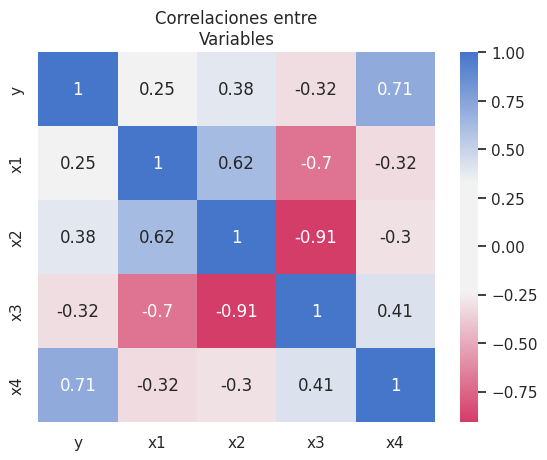

In [5]:
sns.heatmap(df.corr(), annot = True, 
            cmap = sns.diverging_palette(0, 255, sep=77, as_cmap=True)
           ).set(title='Correlaciones entre\nVariables')

Como vemos, existe fuerte asociación entre algunas variables; siendo la más elevada la relación lineal entre $x_2$ y $x3$, que es extrema.<br><br>

La observación de esa matriz de correlaciones nos anticipa la posibilidad de encontrar problemas al especificar el modelo incluyendo todas esas variables. <br><br>

Hacemos el cálculo a ver.

In [6]:
mod = smf.ols('y ~ x1 + x2 + x3 + x4',
                    data = df).fit()

In [7]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     171.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.82e-19
Time:                        10:50:54   Log-Likelihood:                -68.415
No. Observations:                  32   AIC:                             146.8
Df Residuals:                      27   BIC:                             154.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8208     10.123     -0.674      0.506     -27.592      13.950
x1             0.2272      0.100      2.274      0.031       0.022       0.432
x2             0.5537      0.370      1.498      0.146      -0.205       1.312
x3            -0.1495      0.029     -5.116      0.000      -0.210      -0.090
x4             0.1547      0.006     23.992      0.000       0.141       0.168
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.719
Skew:                           0.190   Prob(JB):                        0.698
Kurtosis:                       2.371   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El método <i>summary</i>, presenta un resumen con varias magnitudes, entre las que resaltan:<br><br>
- Dep. Variable: Variable dependiente<br><br>
- R-squared: coeficiente de determinación<br><br>
- Adj. R-squared: coeficiente de determinación ajustado<br><br>
- F-statistic: estadístico de contraste para bondad del ajuste.<br><br>
- Prob (F-statistic): probabilidad asociada con el el estadístico F.<br><br>
- Log-Likelihood: una medida de la bondad del ajuste a los datos, a mayor valor corresponderá un mejor ajuste. No es útil por si solo, pero sirve para comparar entre modelos; aunque adolece de problemas similares al $R^2$.
<br><br>
- AIC: criterio de información de Akaike (sirve para seleccion entre modelos), a menor valor mejor.<br><br>
- BIC: criterio de información de Bayes (sirve para seleccion entre modelos)<br><br>
- coef: valor estimado de los coeficientes de regresión.<br><br>
- std err: error estándar de los coeficientes<br><br>
- t: estadístico distribución t de student, asociado a los coeficientes.<br><br>
- P > |t|: contraste de significación para los coeficientes (p-valor)<br><br>
- Intervalos del 95% de confianza para el valor de los coeficientes.<br><br>
- Durbin-Watson:<i>test</i> para autocorrelación de residuos.<br><br>
- Jarque-Bera: estadístico de normalidad de residuos.<br><br> 
- Prob(JB): probabilidad asociada al estadístico Jarque-Bera<br><br>
- Cond.No: <i>Condition Number</i>: raíz cuadrada del cociente entre los autovalores (eigen) máximo y mínimo del producto interno de las variables predictoras. Un valor superior a 20, alerta sobre posibles problemas como multicolinealidad.

El coeficiente de determinación ajustado, indica que el 96% de variabilidad el porcentaje de producción de gasolina sería explicado por el modelo; algunos coeficientes $(\hat{\beta_0}$ y $\hat{\beta_2})$ aparecen como no significativos, al menos no al 95%  ni al 90% de confianza.<br><br>
Por otra parte, una alerta en las notas del sumario nos indica que puede haber problemas de multicolinealidad o de alguna otra clase, lo cual no sorprende, dados los valores de la matriz de correlación.

En presencia de multicolinealidad alta, como en este caso, los <i>tests</i> de significación sobre los coeficientes ya no son confiables,  la alta colinealidad impide aislar la relación entre cada variable de predicción y la respuesta; los coeficientes de regresión se hacen inestables; incluso su signo podría fluctuar. De modo que cualquier interpretación sobre  la tabla generada por <i>summary</i> no tendra mucha validez. 

Siendo un número pequeño de variables predictoras (4), es posible, incluso, explorar todas las combinaciones posibles de especificación del modelo de regresión, estableciendo algunos criterios de selección, como podrían ser, por ejemplo: $R^2$, $AIC$ y $Log-Likelihood$.<br><br>

Son apenas 32 observaciones por variable, de modo que separar un subconjunto de los datos para  validacion, me luce un poco quiza fuera de contexto, para este problema en particular.

Pero antes, sería bueno explorar también otra posibilidad de perturbación en la obtención de un modelo más apropiado: la diferencia en escalas de las variables.

In [8]:

varivar = df.iloc[:, 1:].var(axis=0).reset_index()
varivar.columns = 'etiquetas varianzas'.split()
varivar = varivar.sort_values('varianzas', ascending=False)

Text(0.5, 1.0, 'Varianzas de Predictoras.')

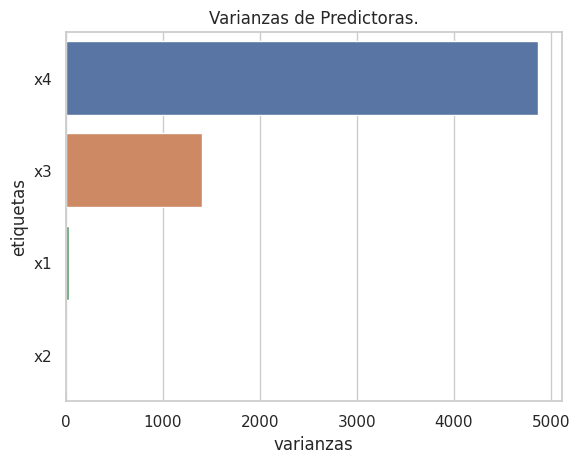

In [9]:
sns.barplot(data = varivar, x='varianzas', y='etiquetas' ,
           orient='h').set_title('Varianzas de Predictoras.')

In [10]:
cm = sns.light_palette("#ff9966", as_cmap=True)

(df.iloc[:, 1:]
     .describe()
     .style.format('{:.0f}')
     .background_gradient(cmap=cm)
)

,x1,x2,x3,x4
count,32,32,32,32
mean,39,4,242,332
std,6,3,38,70
min,32,0,190,205
25%,37,2,217,274
50%,40,5,231,349
75%,41,6,269,383
max,51,9,316,444


Existe bastante disparidad entre las magnitudes que alcanzan las observaciones de las variables independientes, podría convenir algún tipo de estandarización de los datos.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X = df.filter(regex = 'x')
X = pd.DataFrame(scaler.fit_transform(X),
                 columns =X.columns)
df_sc = X.copy()
df_sc['y'] = df['y'].copy()

In [14]:
from itertools import combinations

<i>Itertools</i>, es un paquete integrado a la instalación básica de <i>Python</i>, y con él podemos obtener las posibles combinaciones de variables para integrar un modelo de regresión

In [15]:
lista_variables = ['x1', 'x2', 'x3', 'x4'] # Nombres de las variables

In [16]:
combs = [] # lista vacia que contendrá las combinaciones

Con la función <i>combinations</i> y un <i>bucle</i>, encontramos las posibles combinaciones

In [17]:
for i in range(1, len(lista_variables) + 1):
    combs += list(combinations(lista_variables, i))


combs # lista con posibles combinaciones de variables para integrar el modelo

[('x1',),
 ('x2',),
 ('x3',),
 ('x4',),
 ('x1', 'x2'),
 ('x1', 'x3'),
 ('x1', 'x4'),
 ('x2', 'x3'),
 ('x2', 'x4'),
 ('x3', 'x4'),
 ('x1', 'x2', 'x3'),
 ('x1', 'x2', 'x4'),
 ('x1', 'x3', 'x4'),
 ('x2', 'x3', 'x4'),
 ('x1', 'x2', 'x3', 'x4')]

Creamos un contenedor, para los modelos que desarrollaremos para cada combinación.

In [18]:
lista_modelos = []

Obtenémos los modelos

In [19]:
for r in range(len(combs)):
    modd = smf.ols('y ~'+' + '.join(list(combs[r])),
                             data=df_sc
                            ).fit()
    lista_modelos.append(
        (
            'mod' + str(r),
            'y ~'+' + '.join(list(combs[r])),
            {'r-cuadrado': modd.rsquared,
            'aic':modd.aic,
            'log-likelihood':modd.llf
            }
        )
                    
                    )

In [20]:
lista_modelos

[('mod0',
  'y ~x1',
  {'r-cuadrado': 0.060676510420669794,
   'aic': 243.62260015219076,
   'log-likelihood': -119.81130007609538}),
 ('mod1',
  'y ~x2',
  {'r-cuadrado': 0.14751020473919463,
   'aic': 240.51864221596253,
   'log-likelihood': -118.25932110798126}),
 ('mod2',
  'y ~x3',
  {'r-cuadrado': 0.09924028202169999,
   'aic': 242.28111580366064,
   'log-likelihood': -119.14055790183032}),
 ('mod3',
  'y ~x4',
  {'r-cuadrado': 0.5062695044572013,
   'aic': 223.0411565845859,
   'log-likelihood': -109.52057829229295}),
 ('mod4',
  'y ~x1 + x2',
  {'r-cuadrado': 0.14761369254202905,
   'aic': 242.51475734750846,
   'log-likelihood': -118.25737867375423}),
 ('mod5',
  'y ~x1 + x3',
  {'r-cuadrado': 0.10054202023627734,
   'aic': 244.23483736724825,
   'log-likelihood': -119.11741868362412}),
 ('mod6',
  'y ~x1 + x4',
  {'r-cuadrado': 0.7581571119493703,
   'aic': 202.20270793344955,
   'log-likelihood': -98.10135396672477}),
 ('mod7',
  'y ~x2 + x3',
  {'r-cuadrado': 0.153613375964

Los modelos que contengan ambas variables 'x2' y 'x3', no serán tomados en cuenta debido a la alta correlación entre ellas.<br><br>

En la lista de arriba, los modelos 9 y 12 lucen con los mejores valores en el  criterio Akaike y  <i>Log-Likelihood</i>.<br><br>

AIC se considera mejor mientras menor valor, y <i>Log-Likelihood</i> se considera mejor a mayor valor.

Probamos esos dos modelos: 9 y 12.

In [21]:
mod9 = smf.ols('y ~ x3 + x4',
              data = df_sc).fit()

mod9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     288.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.26e-20
Time:                        10:51:23   Log-Likelihood:                -72.184
No. Observations:                  32   AIC:                             150.4
Df Residuals:                      29   BIC:                             154.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6594      0.429     45.850      0.000      18.782      20.536
x3            -7.7347      0.471    -16.435      0.000      -8.697      -6.772
x4            10.6977      0.471     22.731      0.000       9.735      11.660
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.055
Skew:                           0.085   Prob(JB):                        0.590
Kurtosis:                       2.127   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
mod12 = smf.ols('y ~x1 + x3 + x4',
              data = df_sc).fit()

mod12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     218.5
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.59e-19
Time:                        10:51:29   Log-Likelihood:                -69.692
No. Observations:                  32   AIC:                             147.4
Df Residuals:                      28   BIC:                             153.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6594      0.404     48.702      0.000      18.832      20.486
x1             1.2299      0.566      2.173      0.038       0.070       2.389
x3            -6.8938      0.588    -11.718      0.000      -8.099      -5.689
x4            10.7467      0.444     24.224      0.000       9.838      11.655
==============================================================================
Omnibus:                        0.679   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.738
Skew:                           0.174   Prob(JB):                        0.692
Kurtosis:                       2.343   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ambos modelos son bastante parecidos, excepto por la variable 'x1' en el modelo 12, que es significativa al 95%; pero no al 99%. La advertenicia sobre  <i>condition number</i> no aparece.<br><br>

El modelo 12, presenta mejores valores en <i>aic</i> y <i>log-likelihood</i>.
<br><br>
Mirémos algunos el comportamiento de los residuos y el VIF.

## Diagnósticos.

En la documentación de <i>statsmodels</i>, se encuentra el código de una clase que sirve para obtener algunos diagnósticos, sobre residuos y otras magnitudes asociadas a la regresión.<br><br>.

El siguiente código fue hecho usando a esa <i>clase</i> como referencia. Es conveniente porque permite la obtención de esos <i>diagnósticos</i> para diferentes modelos.<br><br>

Con el modulo <i>statsmodels</i>, se obtienen muchos tipos de gráficos directamente; sin embargo, no es sencillo adaptarlos para cambiar titulos y nombrar los ejes, a fin de cuentas es una de varias alternativas.

In [23]:
from statsmodels.regression.linear_model import RegressionResultsWrapper
import numpy as np
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from typing import Type
from dataclasses import dataclass

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 6)

In [25]:
@dataclass
class Diagnosticos:
    resultados: Type[RegressionResultsWrapper]

    def __post_init__(self):
        if isinstance(self.resultados, RegressionResultsWrapper) is False:
            raise TypeError("El objeto results debe ser instancia de RegressionResultsWrapper de Statsmodels")
        

    def residuos_vs_ajustados(self, ax=None):
        """
        Grafico para identificar no linealidad

        si la línea roja es horizontal, indica que existe un
        patrón lineal en los datos. 

        """
        y_pred = self.resultados.fittedvalues
        residuos = np.array(self.resultados.resid)
        
        if ax is None:
            fig, ax = plt.subplots()
        
        ax.scatter(
            x=y_pred,
            y=residuos,
            )
        ax.axhline(y=0, color = 'r', linestyle = '--',
                  alpha=0.6)
    
        res_abs = np.abs(residuos)
        res_abs_ord = np.flip(np.argsort(res_abs), 0)
        prin_3res_abs = res_abs_ord[:3]
        for i in prin_3res_abs:
            ax.annotate(
                i,
                xy=(y_pred[i], residuos[i]),
                color='C3')

        ax.set_title('Gráfico de Residuos vs\nValores del Ajuste',
                     fontweight="bold")
        ax.set_xlabel('Valores del Ajuste')
        ax.set_ylabel('Residuos')
        return ax
    
    def residuos_vs_exog(self, var, ax=None):
        """
        Grafico para identificar no linealidad

        si la línea roja es horizontal, indica que existe un
        patrón lineal en los datos. 

        """
        residuos = np.array(self.resultados.resid)
        nombre = var.name
        v = var.to_numpy()
    
        
        if ax is None:
            fig, ax = plt.subplots()
        
        ax.scatter(
            x=v,
            y=residuos,
            )
        ax.axhline(y=0, color = 'r', linestyle = '--',
                  alpha=0.6)
    
        res_abs = np.abs(residuos)
        res_abs_ord = np.flip(np.argsort(res_abs), 0)
        prin_3res_abs = res_abs_ord[:3]
        for i in prin_3res_abs:
            ax.annotate(
                i,
                xy=(v[i], residuos[i]),
                color='C3')

        ax.set_title(f'Gráfico de Residuos vs\n{nombre}',
                     fontweight="bold")
        ax.set_xlabel(f'Valores de {nombre}')
        ax.set_ylabel('Residuos')
        return ax

    def __princip_resid(self, cuantiles, ind_princ_res):
        """
        Función para generar indices y coordenadas
        """
        val_influyentes = self.resultados.get_influence()
        norm_res = val_influyentes.resid_studentized_internal
        
        comp = 0
        ind_cuant = 0
        prev_neg = None
        for res_ind in ind_princ_res:
            y = norm_res[res_ind]
            es_neg = y < 0
            if prev_neg == None or prev_neg == es_neg:
                comp += 1
            else:
                ind_cuant -= comp
            x = cuantiles[ind_cuant] if es_neg else np.flip(cuantiles, 0)[ind_cuant]
            ind_cuant += 1
            prev_neg = es_neg
            yield res_ind, x, y


    def Normalidad_Residuos(self, ax=None):
        """
        Grafico de Residuos Estandarizados vs Cuantiles Teóricos

        Para, mediante inspección visual, determinar si los residuos
        estań normalmente distribuidos.

        Si los puntos se disponen sobre la diagonal, indican normalidad

        """
        val_influyentes = self.resultados.get_influence()
        norm_res = val_influyentes.resid_studentized_internal
        
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(norm_res)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        resNormValAbs = np.flip(np.argsort(np.abs(norm_res)), 0)
        princ3ResNormValAbs = resNormValAbs[:3]
        for i, x, y in self.__princip_resid(QQ.theoretical_quantiles, princ3ResNormValAbs):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normalidad de Residuos\n(QQ Plot)', fontweight="bold")
        ax.set_xlabel('Percentiles Teóricos')
        ax.set_ylabel('Residuos Estandarizados')
        return ax

    def tabla_vif(self):
        """
        VIF: factor de inflacioón de varianza

        VIF > 5 en una variable indica alta colinealidad con otras
        variables
        """
        nom_de_vars = self.resultados.model.exog_names
        depvar = self.resultados.model.exog
        vif_df = pd.DataFrame()
        vif_df["Variables"] = nom_de_vars
        vif_df["VIF"] = [variance_inflation_factor(depvar, i) for i in range(depvar.shape[1])]

        return (vif_df
                .sort_values("VIF")
                .round(2))

In [26]:
dgs = Diagnosticos(mod9)

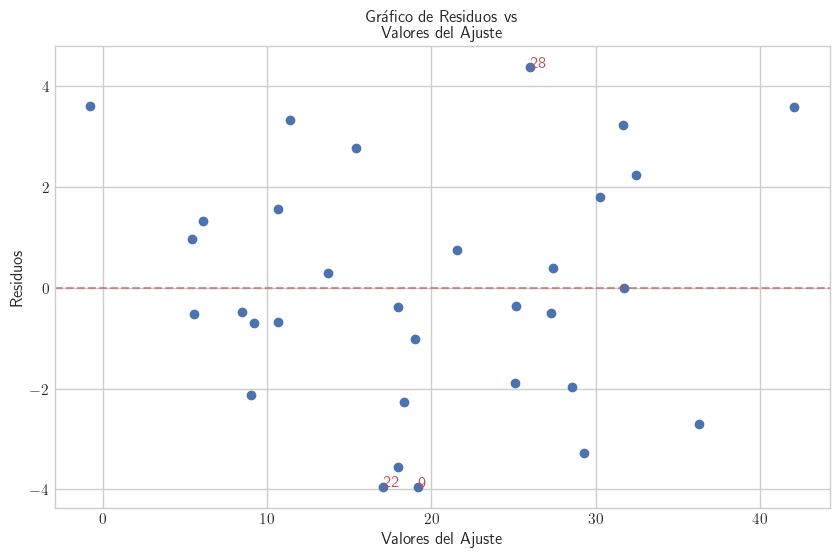

In [27]:
dgs.residuos_vs_ajustados()
plt.show()

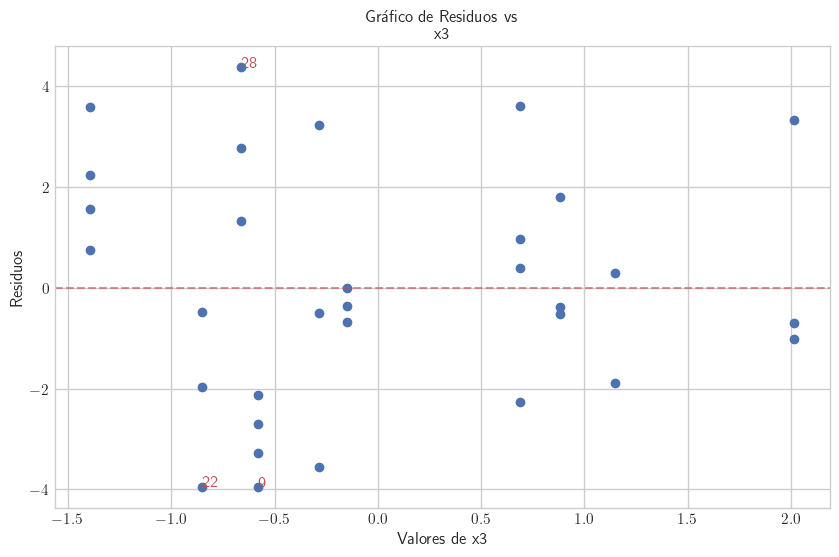

In [28]:
dgs.residuos_vs_exog(df_sc['x3'])
plt.show()

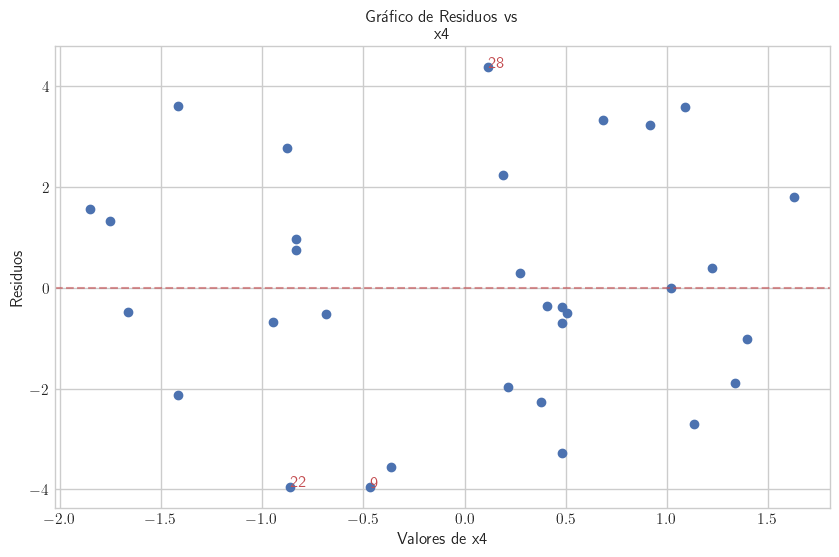

In [29]:
dgs.residuos_vs_exog(df_sc['x4'])
plt.show()

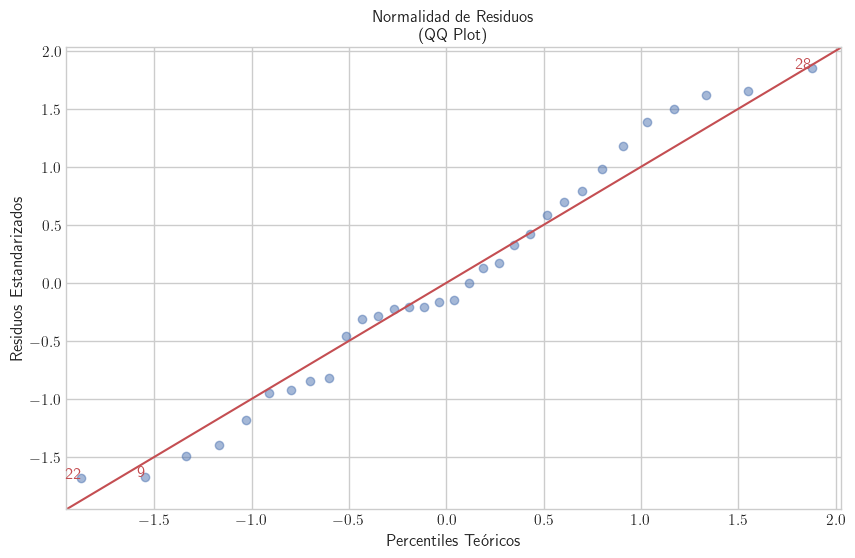

In [30]:
dgs.Normalidad_Residuos()
plt.show()

In [31]:
dgs.tabla_vif()

,Variables,VIF
0,Intercept,1.0
1,x3,1.2
2,x4,1.2


Los residuos no parecen presentar patrones específicos, aunque se notan valores extremos, la hipótesis de normalidad de los residuos, no fue objetada en el <i>summary</i> con el <i>test</i> omnibus de Jarque-Bera, aunque visualmente, la alineación sobre la línea recta roja luce mucho menos que perfecta; y la multicolinealidad no luce problemática.

Veámos el modelo 12

In [32]:
dgs = Diagnosticos(mod12)

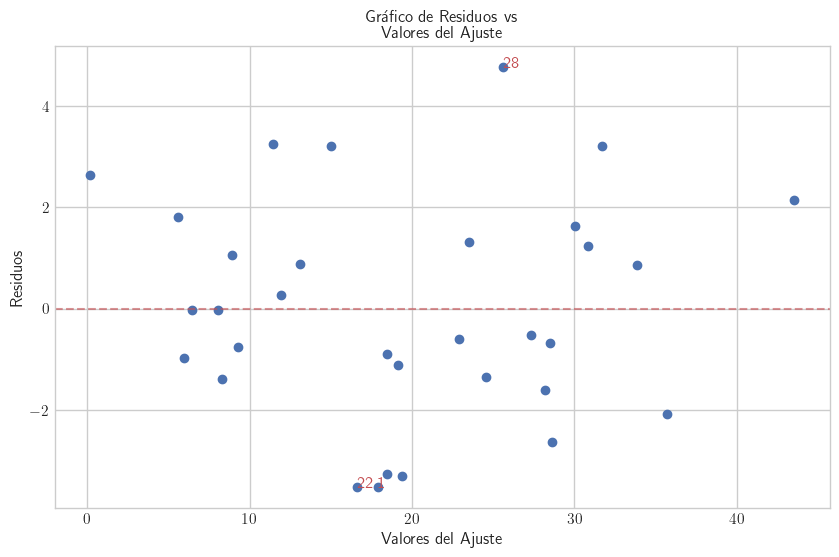

In [33]:
dgs.residuos_vs_ajustados()
plt.show()

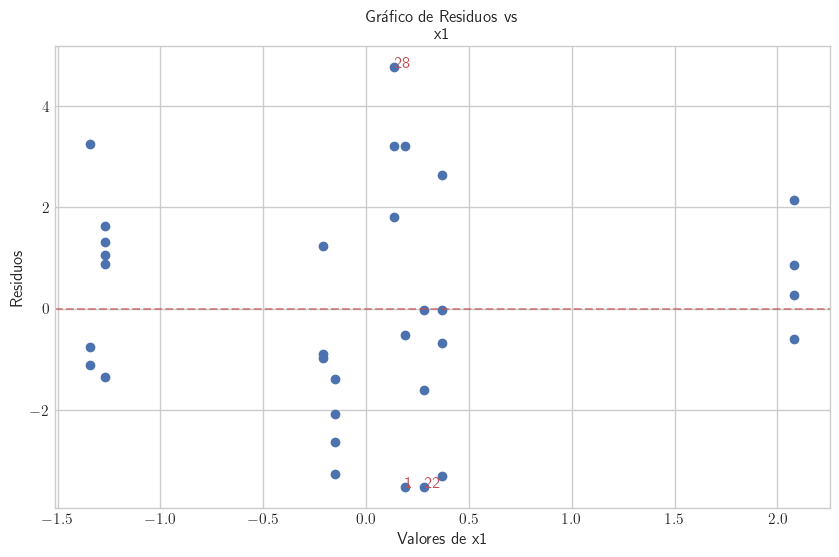

In [34]:
dgs.residuos_vs_exog(df_sc['x1'])
plt.show()

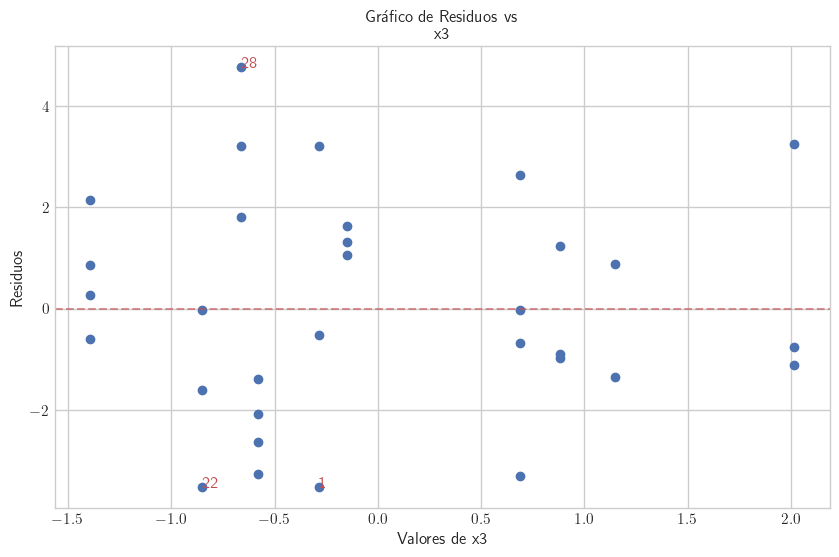

In [35]:
dgs.residuos_vs_exog(df_sc['x3'])
plt.show()

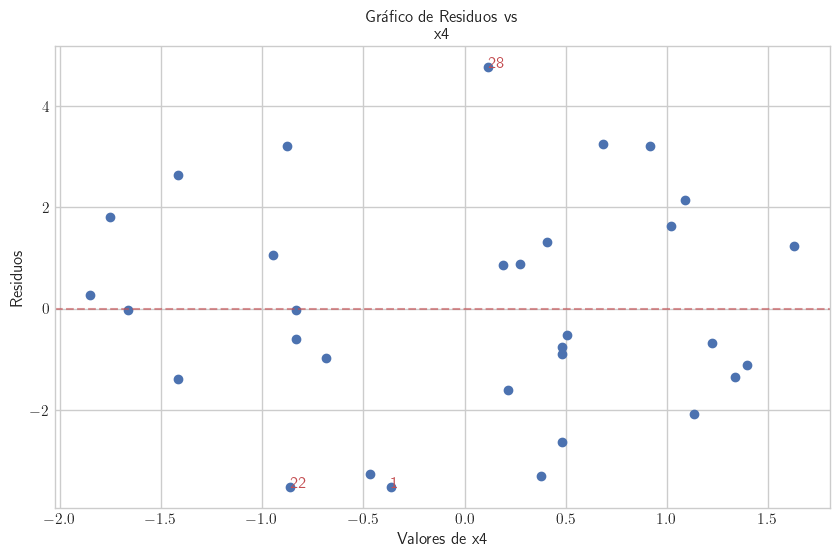

In [36]:
dgs.residuos_vs_exog(df_sc['x4'])
plt.show()

In [58]:
dgs.tabla_vif()

,Variables,VIF
0,Intercept,1.00
3,x4,1.21
1,x1,1.97
2,x3,2.12


Ambos modelos, son bastante similares, los criterios Akaike y <i>Log-Likelihood</i>, parecen favorecer al modelo 12; pero esto podría ser debido a que tiene una variable más. El modelo 9, es más conciso, y preferiría ese; a menos que el 12 presentase mejor desempeño en un conjunto de datos nuevo, con las mismas variables. Para ello sería necesario encontrar ese conjunto de datos.